# Seaborn tutorial

**Note: For this documentation I have upgraded to seaborn version 0.9, which was earlier 0.7 as this version did not have functions like `relplot()` and `catplot()`.**

Seaborn is a Python data visualization library based on **matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics. It is closely integrated with pandas data structures.

[Link to example gallery](https://seaborn.pydata.org/examples/index.html#example-gallery) where you can find code according to the required plot.

Here is some of the functionality that seaborn offers:

* A dataset-oriented API for examining relationships between multiple variables
* Specialized support for using categorical variables to show observations or aggregate statistics
* Automatic estimation and plotting of linear regression models for different kinds dependent variables
* Convenient views onto the overall structure of complex datasets
* Tools for choosing color palettes that faithfully reveal patterns in your data


# Table of content

* [1. API abstraction across visualizations](#1.-API-abstraction-across-visualizations)
* [2. Visualizing statistical relationships](#2.-Visualizing-statistical-relationships)
  * [Scatter plots](#Scatter-plots)
  * [Line plots](#Line-plots)
* [3. Plotting with categorical data](#3.-Plotting-with-categorical-data)
  * [Categorical scatterplots](#Categorical-scatterplots)
  * [Distributions of observations within categories](#Distributions-of-observations-within-categories)
    * [Boxplot](#Boxplot)
    * [Violinplots](#Violinplots)
  * [Statistical estimation within categories](#Statistical-estimation-within-categories)
    * [Bar plots](#Bar-plots)
* [4. Choosing color palettes](#4.-Choosing-color-palettes)
  * [Building color palettes](#Building-color-palettes)
  * [Qualitative color palettes](#Qualitative-color-palettes)
  * [Using circular color systems](#Using-circular-color-systems)
  * [Setting the default color palette](#Setting-the-default-color-palette)
* [5. Controlling figure aesthetics](#5.-Controlling-figure-aesthetics)
  * [Seaborn figure styles](#Seaborn-figure-styles)
  * [Temporarily setting figure style](#Temporarily-setting-figure-style)
  * [Overriding elements of the seaborn styles](#Overriding-elements-of-the-seaborn-styles)

# 1. API abstraction across visualizations

>There is no universal best way to visualize data.  
>Different questions are best answered by different kinds of visualizations.

**Seaborn** tries to make it easy to switch between different visual representations that can be parameterized with the same dataset-oriented API. The function `relplot()` is named that way because it is designed to visualize many different statistical relationships. The `relplot()` function has a convenient **`kind`** parameter to let you easily switch to this alternate representation

# 2. Visualizing statistical relationships

## Scatter plots

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables.

The one we will use most is **`relplot()`**. This is a figure-level function for visualizing statistical relationships using two common approaches: **scatter plots and line plots**. relplot() combines a FacetGrid with one of two axes-level functions:

* scatterplot() (with kind="scatter"; the default)
* lineplot() (with kind="line")

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the **`scatterplot()`** function. **The `scatterplot()` is the default kind in `relplot()`.**

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

```python
sns.relplot(x='Petal-width',y='Petal-height',hue='Flower',data=df)
```

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

```python
sns.relplot(x='Petal-width',y='Petal-height',hue='Flower',style='Flower',data=df)
```

The size of the plot is controlled by **`height` and `aspect`** attribute and aspect tells us the aspect ratio of the plot.
```python
sns.relplot(x='Petal-width',y='Petal-height',hue='Flower',style='Flower',height=6,aspect=1,data=df)
```

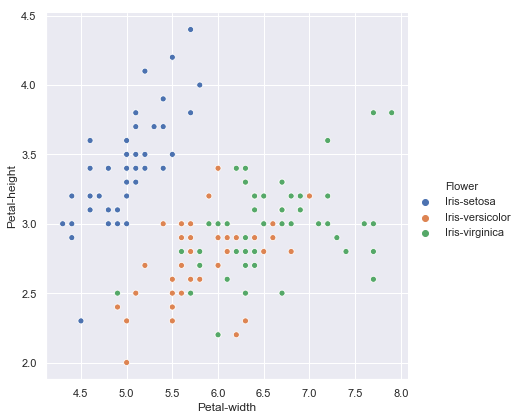

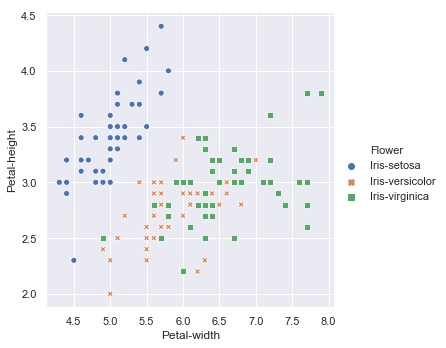

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="darkgrid")

df=pd.read_csv('iris_data.csv',names=['Petal-width','Petal-height','Sepal-width','Sepal-height','Flower'])
df.head()

sns.relplot(x='Petal-width',y='Petal-height',hue='Flower',height=6,aspect=1,data=df)
plt.show()

sns.relplot(x='Petal-width',y='Petal-height',hue='Flower',style='Flower',data=df)
plt.show()

In the examples above, the **hue semantic was categorical, so the default qualitative palette was applied**. If the** hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette**.

For example:
```python
sns.relplot(x='Petal-width',y='Petal-height',hue='Sepal-height',style='Flower',data=df)
plt.show()
```

The third kind of semantic variable changes the **size of each point**:
```python
sns.relplot(x='Petal-width',y='Petal-height',hue='Sepal-height',size='Sepal-width',style='Flower',data=df)
plt.show()
```

We can also separate plots for each category using **`col`** attribute:
```python
sns.relplot(x='Petal-width',y='Petal-height',hue='Sepal-height',col='Flower',data=df)
plt.show()
```

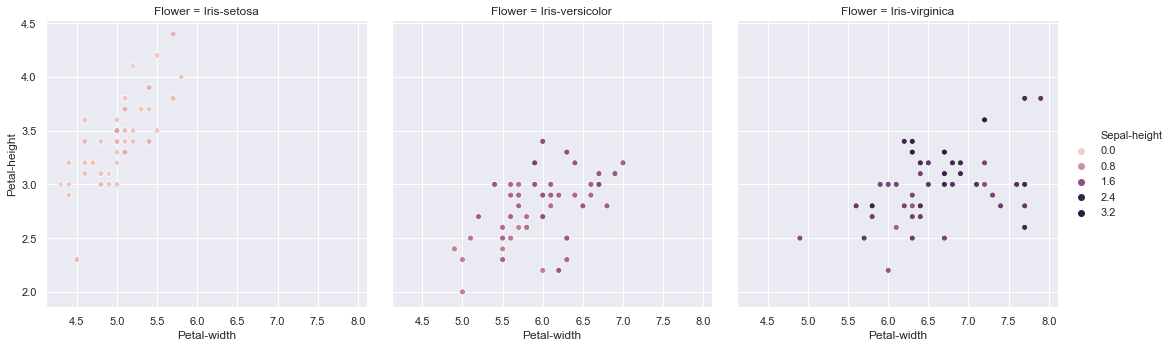

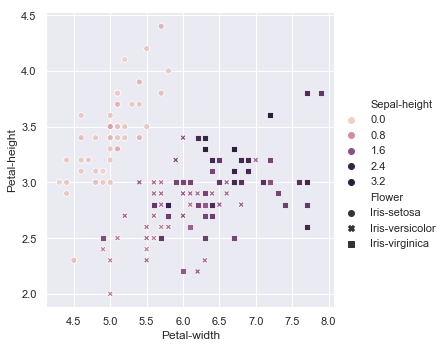

In [7]:
sns.relplot(x='Petal-width',y='Petal-height',hue='Sepal-height',col='Flower',data=df)
plt.show()

sns.relplot(x='Petal-width',y='Petal-height',hue='Sepal-height',style='Flower',data=df)
plt.show()

## Line plots

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the **`lineplot()`** function, either directly or with **`relplot()` by setting `kind="line"`**:

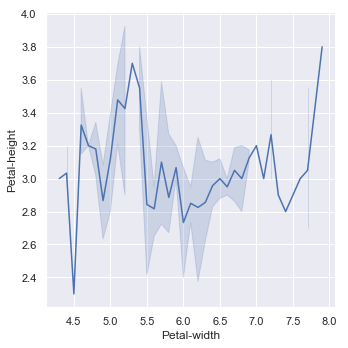

In [5]:
sns.relplot(x='Petal-width',y='Petal-height',kind='line',data=df)
plt.show()

More complex datasets will have **multiple measurements for the same value of the x variable**. The default behavior in seaborn is to **aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean**.
![Sample image](relplot_kind_line.png)

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them with **`ci`** parameter. This parameter can also be used to plot the standard deviation around mean by setting **`ci='sd'`**.
```python
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)
sns.relplot(x="timepoint", y="signal", ci="sd", kind="line", data=fmri)
```
![sample image](relplot_kind_line1.png)

The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements.
* **hue semantics**: It adds multiple lines with different colours.
* ** style semantics**: In line plot it changes the pattern of dashes in the line
* **col semantics**: While these functions can show several semantic variables at once, it’s not always effective to do so. The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them
* **height semantics**: In relplot it tells us about the height of the plot.
* **aspect semantics**: In relplot it tells us about the aspect ration of the plot.

# 3. Plotting with categorical data

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between `relplot()` and either `scatterplot()` or `lineplot()`, there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, `catplot()`, that gives unified higher-level access to them.

Different categorical plot kinds belonging to three different families. These families represent the data using different levels of granularity. They are:

Categorical scatterplots (for small datasets):
* stripplot() (with kind="strip"; the default)
* swarmplot() (with kind="swarm")

Categorical distribution plots (for large datasets):
* boxplot() (with kind="box")
* violinplot() (with kind="violin")
* boxenplot() (with kind="boxen")

Categorical estimate plots:
* pointplot() (with kind="point")
* barplot() (with kind="bar")
* countplot() (with kind="count")


## Categorical scatterplots

The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that **all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable**. 

The approach used by `stripplot()` or `catplot() with default kind`, is to **adjust the positions of points on the categorical axis with a small amount of random “jitter”**

The approach used by `swarmplot()` or `catplot() with kind="swarm"`, **adjusts the points along the categorical axis using an algorithm that prevents them from overlapping**. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets.

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. **The categorical plots do not currently support size or style semantics**.

The ordering of categories can also be controlled on a plot-specific basis using the **`order`** parameter.

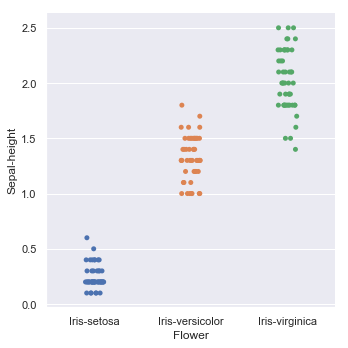

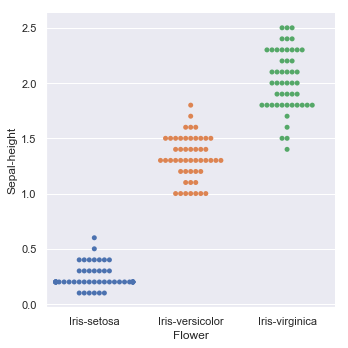

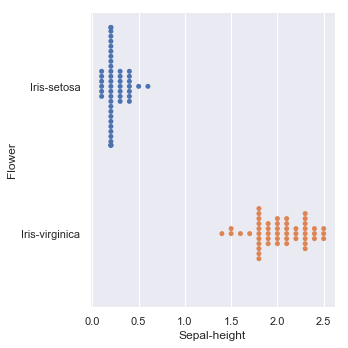

In [47]:
sns.catplot(x="Flower", y="Sepal-height", height=5, aspect=1, data=df)

sns.catplot(x="Flower", y="Sepal-height", kind="swarm", height=5, aspect=1, data=df)

sns.catplot(x="Sepal-height", y="Flower", kind="swarm", order=['Iris-setosa','Iris-virginica'], height=5, aspect=1, data=df)
plt.show()

## Distributions of observations within categories

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category.

### Boxplot
This kind of plot shows the three quartile values (25%, 50% and 75%) of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data. When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap.

### Violinplots
A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure.  Additionally, the quartile and whikser values from the boxplot are shown inside the violin. It’s also possible to “split” the violins when the **hue parameter has only two levels**, which can allow for a more efficient use of space.
```python
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
```
![image of violin plot](catplot_kind_violin.png)

It can also be useful to combine `swarmplot()` or `striplot()` with a `boxplot()` or `violinplot()` to show each observation along with a summary of the distribution.

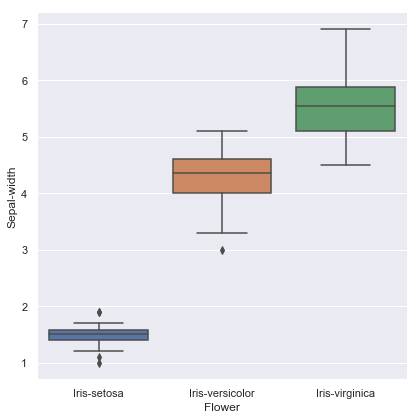

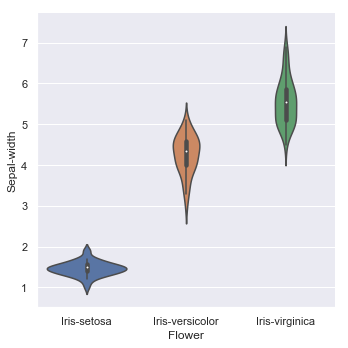

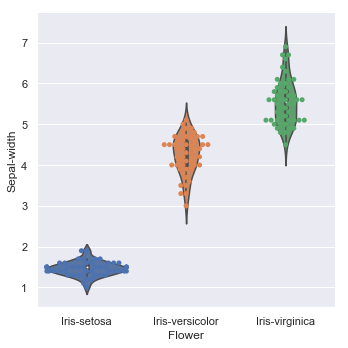

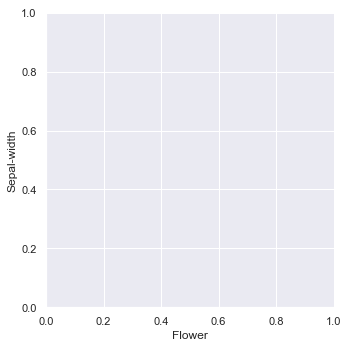

In [44]:
sns.catplot(x="Flower",y="Sepal-width",kind="box",height=6,aspect=1,data=df)

sns.catplot(x="Flower", y="Sepal-width", kind="violin", data=df)

a=sns.catplot(x="Flower", y="Sepal-width", kind="violin", data=df)
sns.catplot(x="Flower", y="Sepal-width", kind="swarm", ax=a.ax, data=df)
plt.show()

## Statistical estimation within categories

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information.

### Bar plots
In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default).

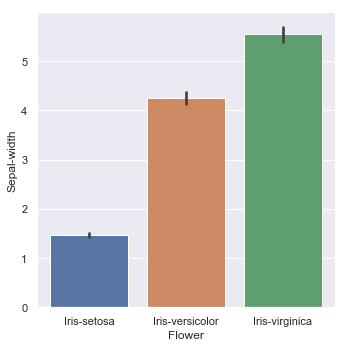

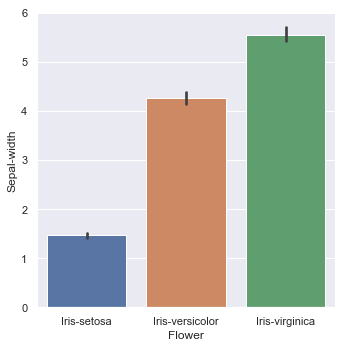

In [46]:
sns.catplot(x="Flower", y="Sepal-width", kind="bar", data=df)
plt.show()

# 4. Choosing color palettes

Seaborn makes it easy to select and use color palettes that are suited to the kind of data you are working with and the goals you have in visualizing it.

## Building color palettes

The most important function for working with discrete color palettes is **`color_palette()`**. This function provides an interface to many (though not all) of the possible ways you can generate colors in seaborn, and it’s used internally by any function that has a palette argument (and in some cases for a color argument when multiple colors are needed).

calling **color_palette() with no arguments will return the current default color cycle**.

**`color_palette()` will accept the name of any seaborn palette or matplotlib colormap** (except jet, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.

A corresponding function, **`set_palette()`**, takes the same arguments and will set the default color cycle for all plots. You can also use color_palette() in a with statement to temporarily change the default palette.

## Qualitative color palettes

Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

When importing seaborn, the default color cycle is changed to a set of six colors that evoke the standard matplotlib color cycle while aiming to be a bit more pleasing to look at. There are six variations of the default theme, called **`deep`, `muted`, `pastel`, `bright`, `dark`, and `colorblind`**.

## Using circular color systems

When you have an **arbitrary number of categories to distinguish** without emphasizing any one, the easiest **approach is to draw evenly-spaced colors in a circular color space** (one where the hue changes while keeping the brightness and saturation constant). **This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.**

The most common way to do this uses the hls color space, which is a simple transformation of RGB values.
```python
sns.palplot(sns.color_palette("hls", 8))
```

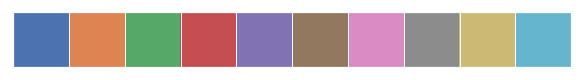

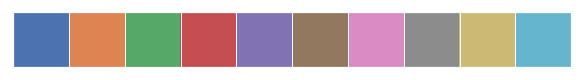

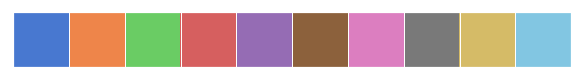

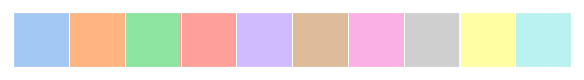

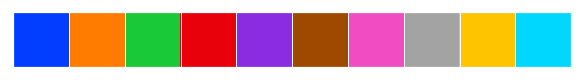

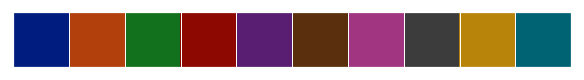

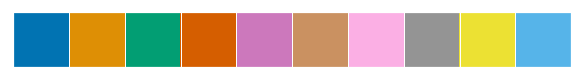

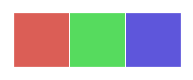

In [57]:
sns.palplot(sns.color_palette())
sns.palplot(sns.color_palette('deep'))
sns.palplot(sns.color_palette('muted'))
sns.palplot(sns.color_palette('pastel'))
sns.palplot(sns.color_palette('bright'))
sns.palplot(sns.color_palette('dark'))
sns.palplot(sns.color_palette('colorblind'))
sns.palplot(sns.color_palette("hls", 3))
plt.show()

## Setting the default color palette

The **`color_palette()`** function has a companion called **`set_palette()`**. **`set_palette()` accepts the same arguments as `color_palette()`, but it changes the default matplotlib parameters so that the palette is used for all plots**.

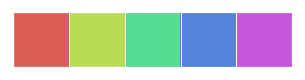

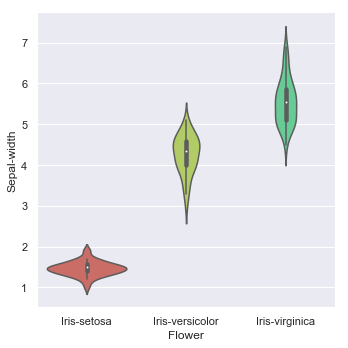

In [60]:
sns.set_palette("hls",5)
sns.palplot(sns.color_palette("hls", 5))
sns.catplot(x="Flower",y="Sepal-width",kind="violin",data=df)
plt.show()

# 5. Controlling figure aesthetics

>Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

**To switch to seaborn defaults, simply call the `set()` function.**

**Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.**

The interface for manipulating these parameters are two pairs of functions. To control the style, use the **`axes_style()` and `set_style()`** functions. To scale the plot, use the **`plotting_context() and set_context()`** functions. In both cases, **the first function returns a dictionary of parameters and the second sets the matplotlib defaults.**

## Seaborn figure styles
There are five preset seaborn themes: **`darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`**. The default theme is **`darkgrid`**. 

![whitegrid](whitegrid.png "whitegrid")
![dark](dark.png "dark")
![white](white.png "white")
![ticks](ticks.png "ticks")

## Temporarily setting figure style

Although it’s easy to switch back and forth, **you can also use the `axes_style()` function in a `with` statement to temporarily set plot parameters.**

## Overriding elements of the seaborn styles

If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of **`axes_style()` and `set_style()`**. Note that you can only override the parameters that are part of the style definition through this method. If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings.

In [61]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

You can then set different versions of these parameters. For example:
```python
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()
```